In [2]:
%%time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #
from sklearn.model_selection import train_test_split
from matplotlib import cm
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
%matplotlib inline

CPU times: user 528 ms, sys: 48 ms, total: 576 ms
Wall time: 709 ms


In [3]:
%%time
print("Comenzo la carga...")
train_req = pd.read_excel("train_requerimientos.xlsx")
train_cliente = pd.read_excel("train_clientes.xlsx")
test_cliente = pd.read_excel('test_clientes.xlsx')
test_req = pd.read_excel('test_requerimientos.xlsx') 
print ("Termino de cargar...")

Comenzo la carga...
Termino de cargar...
CPU times: user 41.7 s, sys: 164 ms, total: 41.9 s
Wall time: 41.9 s


### Enlaces
* https://stackoverflow.com/questions/17995024/how-to-assign-a-name-to-the-a-size-column
* https://datascience.stackexchange.com/questions/20308/how-to-sum-values-grouped-by-two-columns-in-pandas
* https://stackoverflow.com/questions/25748683/pandas-sum-dataframe-rows-for-given-columns

In [2]:
print (train_cliente.columns)
print (train_req.columns)
print ("*******")
print (test_cliente.columns)
print (test_req.columns)

Index(['ID_CORRELATIVO', 'CODMES', 'FLG_BANCARIZADO', 'RANG_INGRESO',
       'FLAG_LIMA_PROVINCIA', 'EDAD', 'ANTIGUEDAD', 'ATTRITION',
       'RANG_SDO_PASIVO_MENOS0', 'SDO_ACTIVO_MENOS0', 'SDO_ACTIVO_MENOS1',
       'SDO_ACTIVO_MENOS2', 'SDO_ACTIVO_MENOS3', 'SDO_ACTIVO_MENOS4',
       'SDO_ACTIVO_MENOS5', 'FLG_SEGURO_MENOS0', 'FLG_SEGURO_MENOS1',
       'FLG_SEGURO_MENOS2', 'FLG_SEGURO_MENOS3', 'FLG_SEGURO_MENOS4',
       'FLG_SEGURO_MENOS5', 'RANG_NRO_PRODUCTOS_MENOS0', 'FLG_NOMINA',
       'NRO_ACCES_CANAL1_MENOS0', 'NRO_ACCES_CANAL1_MENOS1',
       'NRO_ACCES_CANAL1_MENOS2', 'NRO_ACCES_CANAL1_MENOS3',
       'NRO_ACCES_CANAL1_MENOS4', 'NRO_ACCES_CANAL1_MENOS5',
       'NRO_ACCES_CANAL2_MENOS0', 'NRO_ACCES_CANAL2_MENOS1',
       'NRO_ACCES_CANAL2_MENOS2', 'NRO_ACCES_CANAL2_MENOS3',
       'NRO_ACCES_CANAL2_MENOS4', 'NRO_ACCES_CANAL2_MENOS5',
       'NRO_ACCES_CANAL3_MENOS0', 'NRO_ACCES_CANAL3_MENOS1',
       'NRO_ACCES_CANAL3_MENOS2', 'NRO_ACCES_CANAL3_MENOS3',
       'NRO_ACCES_CAN

'FLAG_LIMA_PROVINCIA', 'EDAD', 'ANTIGUEDAD' estos datos faltan

In [43]:
X_train =train_cliente[['ID_CORRELATIVO','ATTRITION' ,'CODMES', 'FLG_BANCARIZADO', 'RANG_INGRESO',
       'FLAG_LIMA_PROVINCIA', 'EDAD', 'ANTIGUEDAD',
       'RANG_SDO_PASIVO_MENOS0', 'SDO_ACTIVO_MENOS0', 'SDO_ACTIVO_MENOS1',
       'SDO_ACTIVO_MENOS2', 'SDO_ACTIVO_MENOS3', 'SDO_ACTIVO_MENOS4',
       'SDO_ACTIVO_MENOS5', 'FLG_SEGURO_MENOS0', 'FLG_SEGURO_MENOS1',
       'FLG_SEGURO_MENOS2', 'FLG_SEGURO_MENOS3', 'FLG_SEGURO_MENOS4',
       'FLG_SEGURO_MENOS5', 'RANG_NRO_PRODUCTOS_MENOS0', 'FLG_NOMINA',
       'NRO_ACCES_CANAL1_MENOS0', 'NRO_ACCES_CANAL1_MENOS1',
       'NRO_ACCES_CANAL1_MENOS2', 'NRO_ACCES_CANAL1_MENOS3',
       'NRO_ACCES_CANAL1_MENOS4', 'NRO_ACCES_CANAL1_MENOS5',
       'NRO_ACCES_CANAL2_MENOS0', 'NRO_ACCES_CANAL2_MENOS1',
       'NRO_ACCES_CANAL2_MENOS2', 'NRO_ACCES_CANAL2_MENOS3',
       'NRO_ACCES_CANAL2_MENOS4', 'NRO_ACCES_CANAL2_MENOS5',
       'NRO_ACCES_CANAL3_MENOS0', 'NRO_ACCES_CANAL3_MENOS1',
       'NRO_ACCES_CANAL3_MENOS2', 'NRO_ACCES_CANAL3_MENOS3',
       'NRO_ACCES_CANAL3_MENOS4', 'NRO_ACCES_CANAL3_MENOS5',
       'NRO_ENTID_SSFF_MENOS0', 'NRO_ENTID_SSFF_MENOS1',
       'NRO_ENTID_SSFF_MENOS2', 'NRO_ENTID_SSFF_MENOS3',
       'NRO_ENTID_SSFF_MENOS4', 'NRO_ENTID_SSFF_MENOS5',
       'FLG_SDO_OTSSFF_MENOS0', 'FLG_SDO_OTSSFF_MENOS1',
       'FLG_SDO_OTSSFF_MENOS2', 'FLG_SDO_OTSSFF_MENOS3',
       'FLG_SDO_OTSSFF_MENOS4', 'FLG_SDO_OTSSFF_MENOS5']]
Y_train = train_cliente[['ATTRITION']]


In [45]:
print (Y_train)
df_tmp = Y_train.copy()
df_tmp['NATTRITION']=1-df_tmp['ATTRITION']
df_tmp.columns

       ATTRITION
0              0
1              0
2              0
3              0
4              0
5              0
6              0
7              0
8              0
9              0
10             0
11             0
12             0
13             0
14             0
15             0
16             0
17             0
18             0
19             0
20             0
21             1
22             0
23             0
24             0
25             0
26             0
27             0
28             1
29             1
30             0
31             0
32             0
33             0
34             0
35             0
36             0
37             1
38             0
39             1
40             0
41             1
42             0
43             1
44             0
45             0
46             1
47             1
48             0
49             0
50             0
51             0
52             0
53             0
54             0
55             0
56             0
57            

Index(['ATTRITION', 'NATTRITION'], dtype='object')

In [26]:
Y_train.columns

Index(['ID_CORRELATIVO', 'ATTRITION'], dtype='object')

In [62]:
X_train_datos=X_train.dropna()
X_train_datos.shape
test_cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 52 columns):
ID_CORRELATIVO               30000 non-null int64
CODMES                       30000 non-null int64
FLG_BANCARIZADO              30000 non-null int64
RANG_INGRESO                 25862 non-null object
FLAG_LIMA_PROVINCIA          28487 non-null object
EDAD                         27649 non-null float64
ANTIGUEDAD                   29254 non-null float64
RANG_SDO_PASIVO_MENOS0       30000 non-null object
SDO_ACTIVO_MENOS0            30000 non-null int64
SDO_ACTIVO_MENOS1            30000 non-null int64
SDO_ACTIVO_MENOS2            30000 non-null int64
SDO_ACTIVO_MENOS3            30000 non-null int64
SDO_ACTIVO_MENOS4            30000 non-null int64
SDO_ACTIVO_MENOS5            30000 non-null int64
FLG_SEGURO_MENOS0            30000 non-null int64
FLG_SEGURO_MENOS1            30000 non-null int64
FLG_SEGURO_MENOS2            30000 non-null int64
FLG_SEGURO_MENOS3            30000

## Total de datos
70 000
* RANG_INGRESO                 60583 non-null object
* EDAD                         64674 non-null float64
* FLAG_LIMA_PROVINCIA          66614 non-null object
* ANTIGUEDAD                   68238 non-null float64

In [12]:
print (X_train.mean()[['ANTIGUEDAD','EDAD']])
print (X_train.mean()[['ANTIGUEDAD','EDAD']])

ANTIGUEDAD     2.549283
EDAD          35.232474
dtype: float64


In [5]:
X_train.info()
print('_'*40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 52 columns):
ID_CORRELATIVO               70000 non-null int64
CODMES                       70000 non-null int64
FLG_BANCARIZADO              70000 non-null int64
RANG_INGRESO                 60583 non-null object
FLAG_LIMA_PROVINCIA          66614 non-null object
EDAD                         64674 non-null float64
ANTIGUEDAD                   68238 non-null float64
RANG_SDO_PASIVO_MENOS0       70000 non-null object
SDO_ACTIVO_MENOS0            70000 non-null int64
SDO_ACTIVO_MENOS1            70000 non-null int64
SDO_ACTIVO_MENOS2            70000 non-null int64
SDO_ACTIVO_MENOS3            70000 non-null int64
SDO_ACTIVO_MENOS4            70000 non-null int64
SDO_ACTIVO_MENOS5            70000 non-null int64
FLG_SEGURO_MENOS0            70000 non-null int64
FLG_SEGURO_MENOS1            70000 non-null int64
FLG_SEGURO_MENOS2            70000 non-null int64
FLG_SEGURO_MENOS3            70000

In [6]:
X_train.head()

,ID_CORRELATIVO,CODMES,FLG_BANCARIZADO,RANG_INGRESO,FLAG_LIMA_PROVINCIA,EDAD,ANTIGUEDAD,RANG_SDO_PASIVO_MENOS0,SDO_ACTIVO_MENOS0,SDO_ACTIVO_MENOS1,SDO_ACTIVO_MENOS2,SDO_ACTIVO_MENOS3,SDO_ACTIVO_MENOS4,SDO_ACTIVO_MENOS5,FLG_SEGURO_MENOS0,FLG_SEGURO_MENOS1,FLG_SEGURO_MENOS2,FLG_SEGURO_MENOS3,FLG_SEGURO_MENOS4,FLG_SEGURO_MENOS5,RANG_NRO_PRODUCTOS_MENOS0,FLG_NOMINA,NRO_ACCES_CANAL1_MENOS0,NRO_ACCES_CANAL1_MENOS1,NRO_ACCES_CANAL1_MENOS2,NRO_ACCES_CANAL1_MENOS3,NRO_ACCES_CANAL1_MENOS4,NRO_ACCES_CANAL1_MENOS5,NRO_ACCES_CANAL2_MENOS0,NRO_ACCES_CANAL2_MENOS1,NRO_ACCES_CANAL2_MENOS2,NRO_ACCES_CANAL2_MENOS3,NRO_ACCES_CANAL2_MENOS4,NRO_ACCES_CANAL2_MENOS5,NRO_ACCES_CANAL3_MENOS0,NRO_ACCES_CANAL3_MENOS1,NRO_ACCES_CANAL3_MENOS2,NRO_ACCES_CANAL3_MENOS3,NRO_ACCES_CANAL3_MENOS4,NRO_ACCES_CANAL3_MENOS5,NRO_ENTID_SSFF_MENOS0,NRO_ENTID_SSFF_MENOS1,NRO_ENTID_SSFF_MENOS2,NRO_ENTID_SSFF_MENOS3,NRO_ENTID_SSFF_MENOS4,NRO_ENTID_SSFF_MENOS5,FLG_SDO_OTSSFF_MENOS0,FLG_SDO_OTSSFF_MENOS1,FLG_SDO_OTSSFF_MENOS2,FLG_SDO_OTSSFF_MENOS3,FLG_SDO_OTSSFF_MENOS4,FLG_SDO_OTSSFF_MENOS5
0,35653,201208,1,Rang_ingreso_06,Lima,25.0,6.0,Rango_SDO_09,0,0,0,0,0,0,1,1,1,1,1,1,Rango_04,0,2,1,0,2,4,1,8,11,14,12,8,12,3,0,1,6,2,5,2,1,1,1,1,1,1,0,0,0,0,0
1,66575,201208,1,Rang_ingreso_03,Provincia,27.0,0.0,Rango_SDO_01,0,0,0,0,0,0,0,0,0,0,0,0,Rango_02,1,0,0,0,0,0,0,0,0,0,0,0,0,24,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0
2,56800,201208,1,Rang_ingreso_01,Provincia,34.0,4.0,Rango_SDO_02,0,0,0,0,0,0,0,0,0,0,0,0,Rango_02,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,2,0,0,0,0,0,0,0,0,0,0,0,0
3,8410,201208,1,Rang_ingreso_04,Provincia,63.0,5.0,Rango_SDO_03,0,0,0,0,0,0,1,1,1,1,1,1,Rango_03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,0,3,3,3,3,3,3,1,1,1,1,1,1
4,6853,201208,1,NaN,Lima,25.0,0.0,Rango_SDO_01,0,0,0,0,0,0,0,0,0,0,0,0,Rango_01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
X_train.describe(include=['O'])

,RANG_INGRESO,FLAG_LIMA_PROVINCIA,RANG_SDO_PASIVO_MENOS0,RANG_NRO_PRODUCTOS_MENOS0
count,60583,66614,70000,70000
unique,9,2,15,6
top,Rang_ingreso_01,Lima,Rango_SDO_01,Rango_02
freq,15495,41637,27341,37121


In [8]:
X_train.describe()

,ID_CORRELATIVO,CODMES,FLG_BANCARIZADO,EDAD,ANTIGUEDAD,SDO_ACTIVO_MENOS0,SDO_ACTIVO_MENOS1,SDO_ACTIVO_MENOS2,SDO_ACTIVO_MENOS3,SDO_ACTIVO_MENOS4,SDO_ACTIVO_MENOS5,FLG_SEGURO_MENOS0,FLG_SEGURO_MENOS1,FLG_SEGURO_MENOS2,FLG_SEGURO_MENOS3,FLG_SEGURO_MENOS4,FLG_SEGURO_MENOS5,FLG_NOMINA,NRO_ACCES_CANAL1_MENOS0,NRO_ACCES_CANAL1_MENOS1,NRO_ACCES_CANAL1_MENOS2,NRO_ACCES_CANAL1_MENOS3,NRO_ACCES_CANAL1_MENOS4,NRO_ACCES_CANAL1_MENOS5,NRO_ACCES_CANAL2_MENOS0,NRO_ACCES_CANAL2_MENOS1,NRO_ACCES_CANAL2_MENOS2,NRO_ACCES_CANAL2_MENOS3,NRO_ACCES_CANAL2_MENOS4,NRO_ACCES_CANAL2_MENOS5,NRO_ACCES_CANAL3_MENOS0,NRO_ACCES_CANAL3_MENOS1,NRO_ACCES_CANAL3_MENOS2,NRO_ACCES_CANAL3_MENOS3,NRO_ACCES_CANAL3_MENOS4,NRO_ACCES_CANAL3_MENOS5,NRO_ENTID_SSFF_MENOS0,NRO_ENTID_SSFF_MENOS1,NRO_ENTID_SSFF_MENOS2,NRO_ENTID_SSFF_MENOS3,NRO_ENTID_SSFF_MENOS4,NRO_ENTID_SSFF_MENOS5,FLG_SDO_OTSSFF_MENOS0,FLG_SDO_OTSSFF_MENOS1,FLG_SDO_OTSSFF_MENOS2,FLG_SDO_OTSSFF_MENOS3,FLG_SDO_OTSSFF_MENOS4,FLG_SDO_OTSSFF_MENOS5
count,70000.000000,70000.0,70000.000000,64674.000000,68238.000000,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49922.740729,201208.0,0.839043,35.232474,2.549283,9.650613e+03,9.389334e+03,9.017541e+03,8.678497e+03,8.477068e+03,8.266672e+03,0.493914,0.458429,0.426000,0.365386,0.323971,0.310257,0.385029,1.035086,1.020943,0.867100,0.891743,0.813557,0.826300,1.786986,1.739486,1.318186,1.255300,1.120829,1.123800,5.558000,5.830871,4.551771,4.146200,3.565257,3.550743,2.030643,1.999243,1.968014,1.928971,1.873600,1.854386,0.538400,0.536557,0.537843,0.535414,0.530657,0.527686
std,28896.279736,0.0,0.367494,11.536038,3.205424,9.971066e+04,9.893696e+04,9.653027e+04,9.415682e+04,8.755091e+04,8.943660e+04,0.499967,0.498272,0.494497,0.481542,0.467993,0.462602,0.486606,2.746253,2.749709,2.512787,2.649147,2.514842,2.545633,4.528780,4.614673,3.929470,3.974264,3.732211,3.777387,7.776502,8.254698,7.203200,7.308573,7.179745,7.331213,1.932397,1.920776,1.907792,1.889000,1.869672,1.853515,0.498527,0.498665,0.498569,0.498748,0.499063,0.499236
min,1.000000,201208.0,0.000000,18.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24958.750000,201208.0,1.000000,27.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49972.500000,201208.0,1.000000,32.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,74948.750000,201208.0,1.000000,41.000000,5.000000,0.000000e+00,0.000000e+00,

## Los que mas ganan son los que menos se van

In [40]:
X_train[['RANG_INGRESO', 'ATTRITION']].groupby(['RANG_INGRESO'], as_index=False).mean().sort_values(by='ATTRITION', ascending=False)

,RANG_INGRESO,ATTRITION
0,Rang_ingreso_01,0.226718
1,Rang_ingreso_02,0.184886
2,Rang_ingreso_03,0.122604
3,Rang_ingreso_04,0.088678
4,Rang_ingreso_05,0.067369
5,Rang_ingreso_06,0.052273
6,Rang_ingreso_07,0.043342
7,Rang_ingreso_08,0.031329
8,Rang_ingreso_09,0.024867


In [ ]:
g = sns.FacetGrid(X_train, col='ATTRITION',size=20)
g.map(plt.hist, 'RANG_INGRESO',bins=20)
g.add_legend();

In [38]:
X_train[['RANG_INGRESO', 'ATTRITION']].groupby(['RANG_INGRESO'], as_index=False).count().sort_values(by='ATTRITION', ascending=False)

,RANG_INGRESO,ATTRITION
0,Rang_ingreso_01,3513
1,Rang_ingreso_02,2378
2,Rang_ingreso_03,1209
3,Rang_ingreso_04,672
5,Rang_ingreso_06,322
4,Rang_ingreso_05,275
6,Rang_ingreso_07,97
7,Rang_ingreso_08,37
8,Rang_ingreso_09,28


In [34]:
X_train[['RANG_INGRESO', 'ATTRITION']]
X_train[X_train['ATTRITION']==1][['RANG_INGRESO', 'ATTRITION']]

,RANG_INGRESO,ATTRITION
21,NaN,1
28,Rang_ingreso_01,1
29,Rang_ingreso_01,1
37,Rang_ingreso_02,1
39,Rang_ingreso_02,1
41,Rang_ingreso_02,1
43,Rang_ingreso_01,1
46,Rang_ingreso_03,1
47,Rang_ingreso_01,1
64,Rang_ingreso_04,1


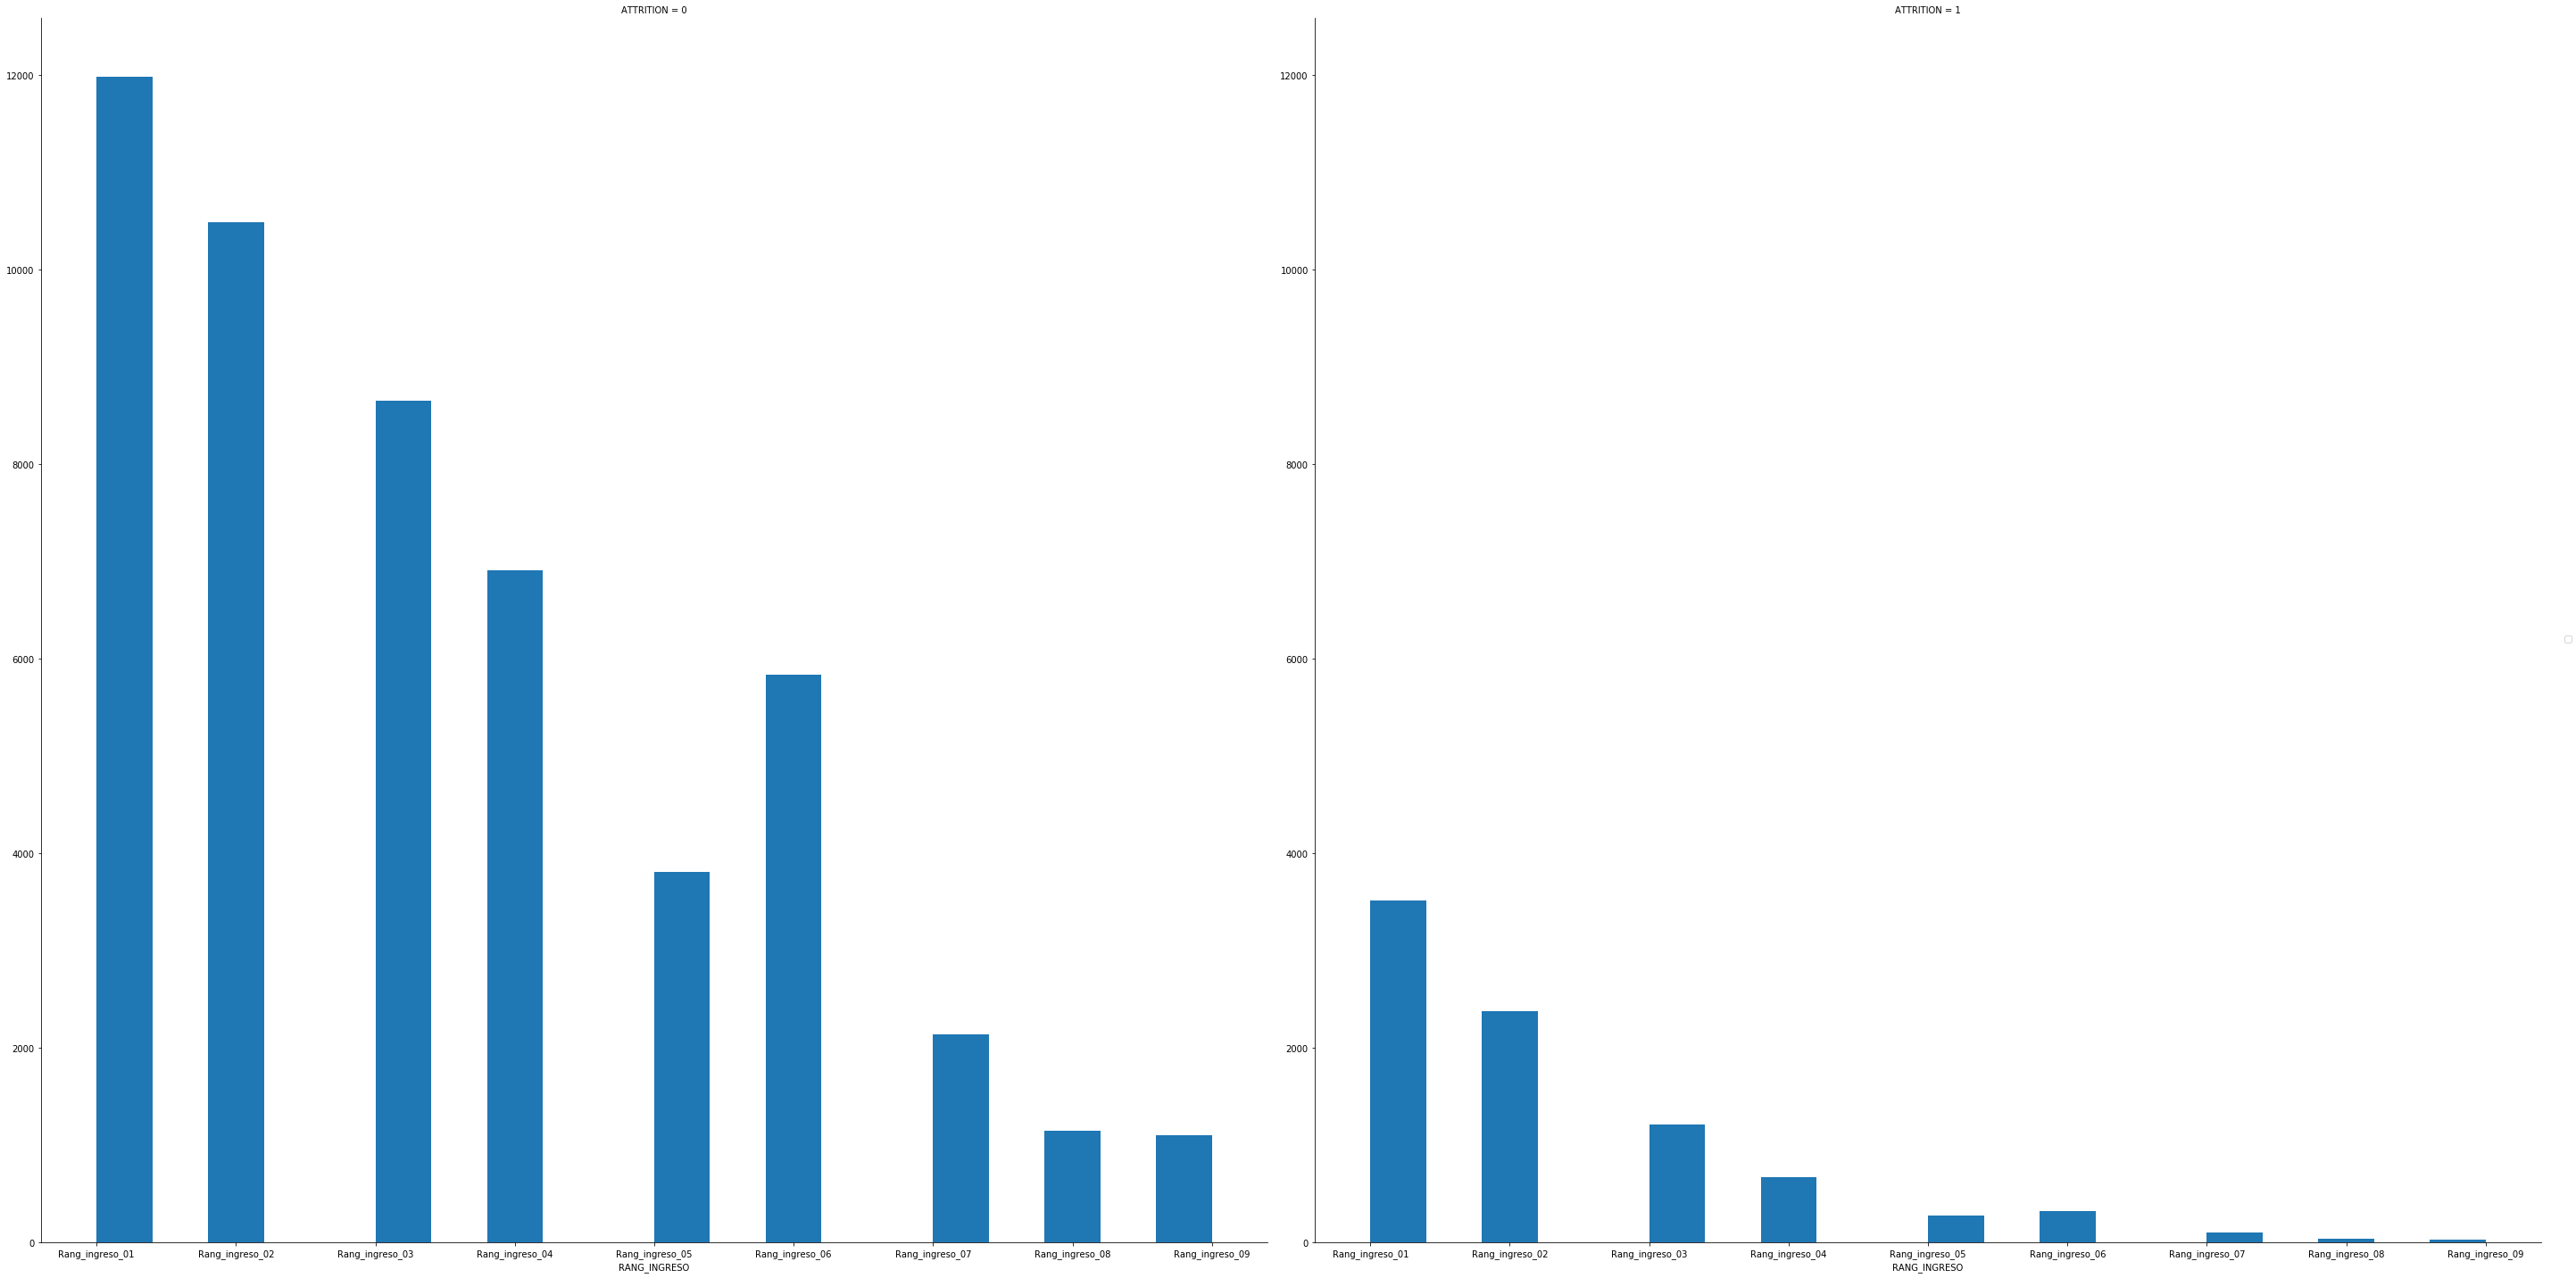

(51417, 6)


ValueError: No group keys passed!

### Tratando requerimientos

In [55]:
%%time
group_train2 =  train_req.groupby(["ID_CORRELATIVO","TIPO_REQUERIMIENTO2","DICTAMEN"])
group_test2 =  test_req.groupby(["ID_CORRELATIVO","TIPO_REQUERIMIENTO2","DICTAMEN"])

df_train_req=group_train2.size().to_frame('size').reset_index()
df_test_req=group_test2.size().to_frame('size').reset_index()

df_train_req['FUSION']=df_train_req['TIPO_REQUERIMIENTO2']+" "+df_train_req['DICTAMEN']
df_test_req['FUSION']=df_train_req['TIPO_REQUERIMIENTO2']+" "+df_train_req['DICTAMEN']

pivot=df_train_req.pivot_table(values='size',index="ID_CORRELATIVO", columns=["TIPO_REQUERIMIENTO2","FUSION"],aggfunc=np.sum)
pivot_test=df_test_req.pivot_table(values='size',index="ID_CORRELATIVO", columns=["TIPO_REQUERIMIENTO2","FUSION"],aggfunc=np.sum)


CPU times: user 112 ms, sys: 4 ms, total: 116 ms
Wall time: 115 ms


In [4]:
#df_train_req[df_train_req["ID_CORRELATIVO"]==154]
#pivot.loc[[154],:]

In [93]:
pivot.fillna(value=0, inplace=True)
pivot_test.fillna(value=0, inplace=True)

pivot_total_reclamo= pivot["Reclamo"].sum(axis=1)
pivot_total_reclamo_test= pivot_test["Reclamo"].sum(axis=1)
#pivot_total_reclamo=pivot_total_reclamo.to_frame('SUMA RECLA')
pivot_total_solicitud= pivot["Solicitud"].sum(axis=1)
pivot_total_solicitud_test= pivot_test["Solicitud"].sum(axis=1)
#pivot_total_solicitud=pivot_total_solicitud.to_frame('SUMA SOLI')
#pivot.reset_index(inplace=True)
#pivot_total_reclamo.reset_index(inplace=True)
#pivot_total_reclamo

pivot_no_procede_reclamo=pivot["Reclamo"]["Reclamo NO PROCEDE"]
pivot_reclamo_parcial=pivot["Reclamo"]["Reclamo PROCEDE PARCIAL"]

pivot_no_procede_reclamo_test=pivot_test["Reclamo"]["Reclamo NO PROCEDE"]
pivot_reclamo_parcial_test=pivot_test["Reclamo"]["Reclamo PROCEDE PARCIAL"]
#pivot_no_procede_reclamo.to_frame('No Reclamo')
pivot_no_procede_solicitud=pivot["Solicitud"]["Solicitud NO PROCEDE"]
pivot_solicitud_parcial=pivot["Solicitud"]["Solicitud PROCEDE PARCIAL"]

pivot_no_procede_solicitud_test=pivot_test["Solicitud"]["Solicitud NO PROCEDE"]
pivot_solicitud_parcial_test=pivot_test["Solicitud"]["Solicitud PROCEDE PARCIAL"]


#pivot_no_procede_reclamo.to_frame('No Solicitud')

requeremiento={}
requeremiento_test={}
requerimiento={"reclamos":pivot_total_reclamo, "no_reclamos":pivot_no_procede_reclamo,"reclamo_parcial":pivot_reclamo_parcial ,"solicitudes":pivot_total_solicitud,"no_solicitudes":pivot_no_procede_solicitud,"solicitudes_parcial":pivot_solicitud_parcial}
requerimiento_test={"reclamos":pivot_total_reclamo_test, "no_reclamos":pivot_no_procede_reclamo_test ,"reclamo_parcial":pivot_reclamo_parcial_test,"solicitudes":pivot_total_solicitud_test,"no_solicitudes":pivot_no_procede_solicitud_test,"solicitudes_parcial":pivot_solicitud_parcial_test}


df_requerimiento=pd.DataFrame(requerimiento)
df_requerimiento_test=pd.DataFrame(requerimiento_test)

df_requerimiento["no_reclamos"] = np.where(df_requerimiento["reclamos"]==0, 0, df_requerimiento["no_reclamos"]/df_requerimiento["reclamos"])
df_requerimiento["reclamo_parcial"] = np.where(df_requerimiento["reclamos"]==0, 0, df_requerimiento["reclamo_parcial"]/df_requerimiento["reclamos"])

df_requerimiento_test["no_reclamos"] = np.where(df_requerimiento_test["reclamos"]==0, 0, df_requerimiento_test["no_reclamos"]/df_requerimiento_test["reclamos"])
df_requerimiento_test["reclamo_parcial"] = np.where(df_requerimiento_test["reclamos"]==0, 0, df_requerimiento_test["reclamo_parcial"]/df_requerimiento_test["reclamos"])

#procesado=pd.DataFrame(pivot_total_reclamo,pivot_total_solicitud)
df_requerimiento["no_solicitudes"] = np.where(df_requerimiento["solicitudes"]==0, 0, df_requerimiento["no_solicitudes"]/df_requerimiento["solicitudes"])
df_requerimiento["solicitudes_parcial"] = np.where(df_requerimiento["solicitudes"]==0, 0, df_requerimiento["solicitudes_parcial"]/df_requerimiento["solicitudes"])

df_requerimiento_test["no_solicitudes"] = np.where(df_requerimiento_test["solicitudes"]==0, 0, df_requerimiento_test["no_solicitudes"]/df_requerimiento_test["solicitudes"])
df_requerimiento_test["solicitudes_parcial"] = np.where(df_requerimiento_test["solicitudes"]==0, 0, df_requerimiento_test["solicitudes_parcial"]/df_requerimiento_test["solicitudes"])


In [94]:
df_requerimiento.reset_index(inplace=True)
df_requerimiento_test.reset_index(inplace=True)

train=pd.merge(train_cliente,df_requerimiento, on="ID_CORRELATIVO", how='left')
#test=pd.merge(test_cliente,df_requerimiento_test, on="ID_CORRELATIVO", how='outer')

In [95]:
print (train.columns)
#print (test.columns)

Index(['ID_CORRELATIVO', 'CODMES', 'FLG_BANCARIZADO', 'RANG_INGRESO',
       'FLAG_LIMA_PROVINCIA', 'EDAD', 'ANTIGUEDAD', 'ATTRITION',
       'RANG_SDO_PASIVO_MENOS0', 'SDO_ACTIVO_MENOS0', 'SDO_ACTIVO_MENOS1',
       'SDO_ACTIVO_MENOS2', 'SDO_ACTIVO_MENOS3', 'SDO_ACTIVO_MENOS4',
       'SDO_ACTIVO_MENOS5', 'FLG_SEGURO_MENOS0', 'FLG_SEGURO_MENOS1',
       'FLG_SEGURO_MENOS2', 'FLG_SEGURO_MENOS3', 'FLG_SEGURO_MENOS4',
       'FLG_SEGURO_MENOS5', 'RANG_NRO_PRODUCTOS_MENOS0', 'FLG_NOMINA',
       'NRO_ACCES_CANAL1_MENOS0', 'NRO_ACCES_CANAL1_MENOS1',
       'NRO_ACCES_CANAL1_MENOS2', 'NRO_ACCES_CANAL1_MENOS3',
       'NRO_ACCES_CANAL1_MENOS4', 'NRO_ACCES_CANAL1_MENOS5',
       'NRO_ACCES_CANAL2_MENOS0', 'NRO_ACCES_CANAL2_MENOS1',
       'NRO_ACCES_CANAL2_MENOS2', 'NRO_ACCES_CANAL2_MENOS3',
       'NRO_ACCES_CANAL2_MENOS4', 'NRO_ACCES_CANAL2_MENOS5',
       'NRO_ACCES_CANAL3_MENOS0', 'NRO_ACCES_CANAL3_MENOS1',
       'NRO_ACCES_CANAL3_MENOS2', 'NRO_ACCES_CANAL3_MENOS3',
       'NRO_ACCES_CAN

In [96]:
values = {'no_reclamos': 0, 'no_solicitudes': 0, 'reclamos': 0,'solicitudes': 0 ,'no_reclamos': 0,'no_solicitudes': 0,'reclamo_parcial':0,'solicitudes_parcial':0}
train.fillna(value=values, inplace=True)
#test.fillna(value=values, inplace=True)
#test

,ID_CORRELATIVO,CODMES,FLG_BANCARIZADO,RANG_INGRESO,FLAG_LIMA_PROVINCIA,EDAD,ANTIGUEDAD,ATTRITION,RANG_SDO_PASIVO_MENOS0,SDO_ACTIVO_MENOS0,SDO_ACTIVO_MENOS1,SDO_ACTIVO_MENOS2,SDO_ACTIVO_MENOS3,SDO_ACTIVO_MENOS4,SDO_ACTIVO_MENOS5,FLG_SEGURO_MENOS0,FLG_SEGURO_MENOS1,FLG_SEGURO_MENOS2,FLG_SEGURO_MENOS3,FLG_SEGURO_MENOS4,FLG_SEGURO_MENOS5,RANG_NRO_PRODUCTOS_MENOS0,FLG_NOMINA,NRO_ACCES_CANAL1_MENOS0,NRO_ACCES_CANAL1_MENOS1,NRO_ACCES_CANAL1_MENOS2,NRO_ACCES_CANAL1_MENOS3,NRO_ACCES_CANAL1_MENOS4,NRO_ACCES_CANAL1_MENOS5,NRO_ACCES_CANAL2_MENOS0,NRO_ACCES_CANAL2_MENOS1,NRO_ACCES_CANAL2_MENOS2,NRO_ACCES_CANAL2_MENOS3,NRO_ACCES_CANAL2_MENOS4,NRO_ACCES_CANAL2_MENOS5,NRO_ACCES_CANAL3_MENOS0,NRO_ACCES_CANAL3_MENOS1,NRO_ACCES_CANAL3_MENOS2,NRO_ACCES_CANAL3_MENOS3,NRO_ACCES_CANAL3_MENOS4,NRO_ACCES_CANAL3_MENOS5,NRO_ENTID_SSFF_MENOS0,NRO_ENTID_SSFF_MENOS1,NRO_ENTID_SSFF_MENOS2,NRO_ENTID_SSFF_MENOS3,NRO_ENTID_SSFF_MENOS4,NRO_ENTID_SSFF_MENOS5,FLG_SDO_OTSSFF_MENOS0,FLG_SDO_OTSSFF_MENOS1,FLG_SDO_OTSSFF_MENOS2,FLG_SDO_OTSSFF_MENOS3,FLG_SDO_OTSSFF_MENOS4,FLG_SDO_OTSSFF_MENOS5,no_reclamos,no_solicitudes,reclamo_parcial,reclamos,solicitudes,solicitudes_parcial
0,35653,201208,1,Rang_ingreso_06,Lima,25.0,6.0,0,Rango_SDO_09,0,0,0,0,0,0,1,1,1,1,1,1,Rango_04,0,2,1,0,2,4,1,8,11,14,12,8,12,3,0,1,6,2,5,2,1,1,1,1,1,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0
1,66575,201208,1,Rang_ingreso_03,Provincia,27.0,0.0,0,Rango_SDO_01,0,0,0,0,0,0,0,0,0,0,0,0,Rango_02,1,0,0,0,0,0,0,0,0,0,0,0,0,24,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,56800,201208,1,Rang_ingreso_01,Provincia,34.0,4.0,0,Rango_SDO_02,0,0,0,0,0,0,0,0,0,0,0,0,Rango_02,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,1.0,0.0,0.0
3,8410,201208,1,Rang_ingreso_04,Provincia,63.0,5.0,0,Rango_SDO_03,0,0,0,0,0,0,1,1,1,1,1,1,Rango_03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,0,3,3,3,3,3,3,1,1,1,1,1,1,0.0,1.0,0.0,0.0,1.0,0.0
4,6853,201208,1,NaN,Lima,25.0,0.0,0,Rango_SDO_01,0,0,0,0,0,0,0,0,0,0,0,0,Rango_01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,22240,201208,0,Rang_ingreso_02,Lima,27.0,0.0,0,Rango_SDO_01,0,0,0,0,0,0,0,0,0,0,0,0,Rango_02,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
6,86930,201208,1,Rang_ingreso_04,Provincia,41.0,0.0,0,Cero,0,0,0,0,0,0,1,1,1,0,0,0,Rango_02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,2,2,2,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0
7,88272,201208,0,NaN,Provincia,23.0,0.0,0,Rango_SDO_08,0,0,0,0,0,0,0,0,0,0,0,0,Rango_02,0,0,0,0,0,0,0,0,0,0,0,0,0,14,7,11,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,94608,201208,0,NaN,Lima,NaN,0.0,0,Cero,0,0,0,0,0,0,0,0,0,0,0,0,Rango_01,0,0,0,0,0,0,0,0,0,0,0,0,0,7,17,10,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
9,26877,201208,1,Rang_ingreso_06,Lima,26.0,7.0,0,Rango_SDO_07,0,0,0,0,0,0,1,1,1,1,1,1,Rango_04,1,0,2,1,3,8,8,16,20,19,15,17,15,10,32,19,13,15,11,5,5,5,5,5,5,0,1,0,1,1,1,0.5,0.0,0.0,2.0,0.0,0.0


In [97]:
train=train.dropna()

In [46]:
train.shape

NameError: name 'train' is not defined

In [99]:
df = pd.get_dummies(train)

In [103]:
df.columns

Index(['ID_CORRELATIVO', 'CODMES', 'FLG_BANCARIZADO', 'EDAD', 'ANTIGUEDAD',
       'ATTRITION', 'SDO_ACTIVO_MENOS0', 'SDO_ACTIVO_MENOS1',
       'SDO_ACTIVO_MENOS2', 'SDO_ACTIVO_MENOS3', 'SDO_ACTIVO_MENOS4',
       'SDO_ACTIVO_MENOS5', 'FLG_SEGURO_MENOS0', 'FLG_SEGURO_MENOS1',
       'FLG_SEGURO_MENOS2', 'FLG_SEGURO_MENOS3', 'FLG_SEGURO_MENOS4',
       'FLG_SEGURO_MENOS5', 'FLG_NOMINA', 'NRO_ACCES_CANAL1_MENOS0',
       'NRO_ACCES_CANAL1_MENOS1', 'NRO_ACCES_CANAL1_MENOS2',
       'NRO_ACCES_CANAL1_MENOS3', 'NRO_ACCES_CANAL1_MENOS4',
       'NRO_ACCES_CANAL1_MENOS5', 'NRO_ACCES_CANAL2_MENOS0',
       'NRO_ACCES_CANAL2_MENOS1', 'NRO_ACCES_CANAL2_MENOS2',
       'NRO_ACCES_CANAL2_MENOS3', 'NRO_ACCES_CANAL2_MENOS4',
       'NRO_ACCES_CANAL2_MENOS5', 'NRO_ACCES_CANAL3_MENOS0',
       'NRO_ACCES_CANAL3_MENOS1', 'NRO_ACCES_CANAL3_MENOS2',
       'NRO_ACCES_CANAL3_MENOS3', 'NRO_ACCES_CANAL3_MENOS4',
       'NRO_ACCES_CANAL3_MENOS5', 'NRO_ENTID_SSFF_MENOS0',
       'NRO_ENTID_SSFF_MENOS1', 'NRO

In [9]:
print("Train")
train.sort_values(by="ID_CORRELATIVO", inplace=True)
print ("El número de filas " + str(train.shape))
print (train.groupby(["ATTRITION"]).size())


Train
El número de filas (70000, 59)
ATTRITION
0    59178
1    10822
dtype: int64


In [10]:
#[train["ATTRITION"]==1]
#'ANTIGUEDAD','EDAD','SDO_ACTIVO_MENOS0','FLG_SEGURO_MENOS0','FLG_NOMINA','NRO_ENTID_SSFF_MENOS0','FLG_SDO_OTSSFF_MENOS0'
X_train=train[['FLG_BANCARIZADO','ANTIGUEDAD','EDAD','SDO_ACTIVO_MENOS0','FLG_SEGURO_MENOS0','FLG_NOMINA','NRO_ENTID_SSFF_MENOS0','%no_reclamos',"%no_solicitudes"]]
X_train=X_train.fillna(X_train.mean()[['ANTIGUEDAD','EDAD']])
Y_train =train['ATTRITION']
print (X_train.shape)
print (Y_train.shape)
#X_train_np=X_train.as_matrix(columns=None)
#Y_train_np=Y_train.as_matrix(columns=None)

(70000, 9)
(70000,)


In [11]:
##Feature pair plot, cmap=cmap
%matplotlib inline 
#cmap = cm.get_cmap('gnuplot')
#colors=['green','red']
#scatter = pd.plotting.scatter_matrix(X_train,c=Y_train.apply(lambda x:colors[x]),marker='o',s=40, figsize=(100, 100),hist_kwds={'bins':15},cmap='brg')


* Bancarizado es un atributo importante, parece que todos son verdes
* mientras mayor el saldo activo menos se retiran
* Bancarizado y más de 10 años no se va

In [114]:
#X_train2 = X_train.copy()
#X_train2=X_train.fillna(X_train.mean()[['ANTIGUEDAD','EDAD']])
X_train_p, X_test_p, Y_train_p,Y_test_p = train_test_split(X_train,Y_train,random_state=0)#
#print (X_train_p)

X_train_a=X_train_p.as_matrix()
X_train_a
X_train_a[0,:]

array([52836, 0, 201208, 1, 'Rang_ingreso_06', 'Lima', 30.0, 6.0,
       'Rango_SDO_08', 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 'Rango_04', 0,
       6, 13, 12, 8, 10, 8, 0, 0, 0, 0, 0, 0, 2, 21, 9, 12, 4, 6, 3, 3, 3,
       2, 3, 3, 0, 0, 0, 0, 0, 1], dtype=object)

Comenzo bucle knn
termino bucle knn
    nume     score   weights
34    18  0.846000   uniform
36    19  0.845829   uniform
30    16  0.845714   uniform
32    17  0.844914   uniform
28    15  0.844629   uniform
26    14  0.844000   uniform
14     8  0.840629   uniform
10     6  0.840343   uniform
37    19  0.838629  distance
35    18  0.838514  distance
6      4  0.838457   uniform
31    16  0.838229  distance
33    17  0.838057  distance
29    15  0.837657  distance
27    14  0.837657  distance
2      2  0.835086   uniform
22    12  0.835029   uniform
15     8  0.834514  distance
18    10  0.834000   uniform
24    13  0.833543   uniform
11     6  0.833486  distance
20    11  0.832400   uniform
16     9  0.829429   uniform
7      4  0.829200  distance
23    12  0.828343  distance
19    10  0.828114  distance
25    13  0.827314  distance
21    11  0.826571  distance
12     7  0.825657   uniform
8      5  0.825600   uniform
17     9  0.824343  distance
9      5  0.821429  distance
13     

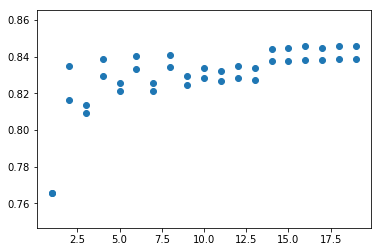

Wall time: 2min 1s


In [14]:
%%time
print ("Comenzo bucle knn")
from sklearn.neighbors import KNeighborsClassifier

aux_dict = {}
aux_list =[]
for nume in range(1,20):
    for weights in ['uniform', 'distance']:
        knn = KNeighborsClassifier(n_neighbors=nume,weights=weights)
        knn.fit(X_train_p,Y_train_p)
        aux_dict={'nume': nume, 'weights': weights, 'score':knn.score(X_test_p,Y_test_p)}
        aux_list.append(aux_dict)
        #print (str(nume)+' '+str(weights)+' '+str(knn.score(X_test,y_test))) 

print ("termino bucle knn")
aux_DataFrame=pd.DataFrame(aux_list).sort_values(by='score', ascending = False)
print (aux_DataFrame)

plt.figure()
plt.scatter(aux_DataFrame.nume, aux_DataFrame.score)
plt.show()

In [30]:
prediction = knn.predict(X_test_p)
X_test_c = X_test_p.copy()
X_test_c['real'] = Y_test_p
X_test_c['predic'] = prediction
#print (X_test_c[['real','predic']])
print (X_test_c[X_test_c['predic']==0][['predic']].size)
print (X_test_c[X_test_c['predic']==1][['predic']].size)

17007
493
